### Tutorial for creating Example animation 1 with FieldVis

Author: Nathanyel Schut<br>
Date: 12-06-2022

In [1]:
from fieldvis import et_reader, field_dp, field_plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

import dill
dill.settings['recurse'] = True

Paths to data, adjust these to where they are stored on your computer

In [2]:
data_path = r"C:\Users\lolha\Documents\Bachelor_project\data"
save_path = r"C:\Users\lolha\Documents\Bachelor_project\Example Animation 1"

Getting lists of the full filenames

In [3]:
# it_list, files_B = field_dp.find_iterations('Bvec', data_path, return_files=True)
it_list, files_bernoulli = field_dp.find_iterations('rho2', data_path, return_files=True)
it_list, files_rho = field_dp.find_iterations('rho', data_path, return_files=True)

print('Iterations:', it_list, '\n')
# print('Magnetic field files:', files_B, '\n')
print('Bernoulli criterion files:', files_rho, '\n')

Iterations: [53760] 

Bernoulli criterion files: ['C:\\Users\\lolha\\Documents\\Bachelor_project\\data\\rho.xyz_it=53760.h5'] 



Creating the data readers

In [4]:
rl = 1

# def data_reader_B(index):
#     return et_reader.ET_to_numpy(rl, files_B[index*3:(index*3 + 3)])

def new_data_reader_B(index):
    file_name = files_bernoulli[index]
    file = h5py.File(file_name)
    data = [np.array(file['bx_v3d1']), np.array(file['by_v3d1']), np.array(file['bz_v3d1'])]
    return data

def data_reader_bernoulli(index):
    file_name = files_bernoulli[index]
    file = h5py.File(file_name)
    data = np.array(file['bernoulli_v3d1'])
    
    return [data]

def data_reader_rho(index):
    file_name = files_bernoulli[index]
    file = h5py.File(file_name)
    data = np.array(file['rho_v3d1'])
    
    return [data]

def raw_data_reader_rho(index):
    return et_reader.ET_to_numpy(rl, [files_rho[index]])

# Bvec_data = data_reader_B(0)
# print('Shape of the Bvec reader output:', np.shape(Bvec_data))
# print('Type of a component of the vector data:', type(Bvec_data[0]))

Getting grid information

In [5]:
file = h5py.File(files_rho[0])
print(file.keys())

# delta = file['/'].attrs['delta']
# print(delta)

var_name, it, tl, rl_list, c_list = et_reader.ET_file_parser(file)
delta, ghostzones, dimensions, min_coords, max_coords = et_reader.ET_get_grid_info(var_name, it, tl, rl, c_list, file)

print('Variable name:', var_name)
print('Iteration:', it)
print('Reference levels:', rl_list)
print('Grid spacings:', delta)
print('Ghostzones:', ghostzones)
print('x-range:', round(min_coords[0], 2), round(max_coords[0], 2))
print('y-range:', round(min_coords[1], 2), round(max_coords[1], 2))
print('z-range:', round(min_coords[2], 2), round(max_coords[2], 2))

<KeysViewHDF5 ['HYDROBASE::rho it=53760 tl=0 rl=0 c=0', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=10', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=100', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1000', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1001', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1002', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1003', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1004', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1005', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1006', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1007', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1008', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1009', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=101', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1010', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1011', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1012', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1013', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1014', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1015', 'HYDROBASE::rho it=53760 tl=0 rl=0 c=1016', 'HYDROBASE::rho it=53760 tl

Other plot settings, such as opacity and camera position

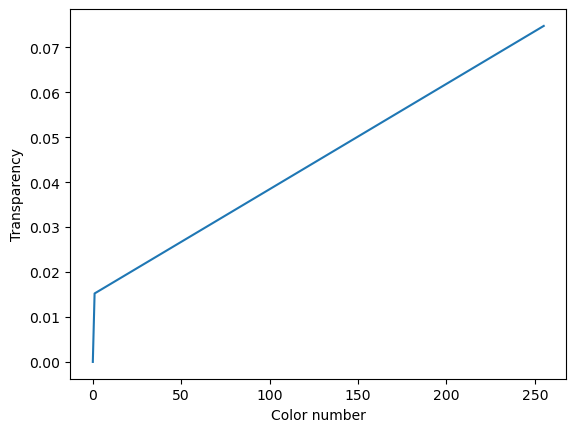

In [6]:
linear = lambda x, a, b: a*x + b

opacity = linear(np.arange(0, 256, 1), 0.06, 0.015*256)

# Filter out all data outside the data range provided
opacity[0] = 0

# Camera position, focal point and up vector
cpos = [(245.23096320064798, 840.741228880382, -315.03912073198734),
(-6.211109756869366, 11.909251907227983, 35.24184501603246),
(-0.11027435252567375, -0.358338604566275, -0.9270560995174663)]

plt.plot(opacity/256);
plt.ylabel('Transparency');
plt.xlabel('Color number');

Dictionaries with plot settings

In [7]:
kwargs = {
    'window_size': [600, 1000],
    'position': cpos[0],
    'focal_point': cpos[1],
    'up': cpos[2],
    'background_color': '#9e9e9e',
    'transparent_background': False,
    'off_screen': False,
    'screenshot': False,
    'show_grid': False,
    'return_cpos': False,
    'notebook': True,
    'jupyter_backend': 'static',
    'anti_aliasing': True,
    'multi_samples': 4
}

rho_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0],
    'cmap': 'RdBu_r',
    'log_scale': True,
    'clim': [-7, -2],
    'mapper': 'gpu',
    'scalar_bar_args': {'use_opacity': False},
    'opacity': opacity,
    'n_colors': 256,
    'shade': True,
    'mirror_z': True,
    'name': 'Density field',
    'volume_or_isosurface': 'isosurface',
    'isosurface_thresholds': [-3.5],#, -5, -6],
    'isosurface_opacity': 0.5
}

raw_rho_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0],
    'cmap': 'YlGn_r',
    'log_scale': True,
    'clim': [-7, -2],
    'mapper': 'gpu',
    'scalar_bar_args': {'use_opacity': False},
    'opacity': opacity,
    'n_colors': 256,
    'shade': True,
    'mirror_z': True,
    'name': 'Density field raw data',
    'volume_or_isosurface': 'isosurface',
    'isosurface_thresholds': [-3.5],#, -5, -6],
    'isosurface_opacity': 0.5
}

bernoulli_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0.0],
    'cmap': 'Reds',
    'log_scale': False,
    'clim': [1.02, 3],
    'mapper': 'gpu',
    'scalar_bar_args': {'use_opacity': False, 'color':'w'},
    'opacity': opacity,
    'n_colors': 256,
    'shade': True,
    'name': 'Bernoulli criterion',
    'diffuse': 1,
    'mirror_z': True
}

field_line_kwargs = {
    'spacing': delta,
    'origin': [-138, -138, 0.0],
    'source_center': [0, 0, 0],
    'n_points': 30,
    'radius': 0.7,
    'source_radius': 9,
    'color': 'r',
    'mirror_z': False,
    'streamlines_or_arrows' : 'arrows',
    'scale_factor' : 5,
    'tolerance' : 0.03,
    'mask_thresholds' : [0.005, 1]
}

Creating the plot

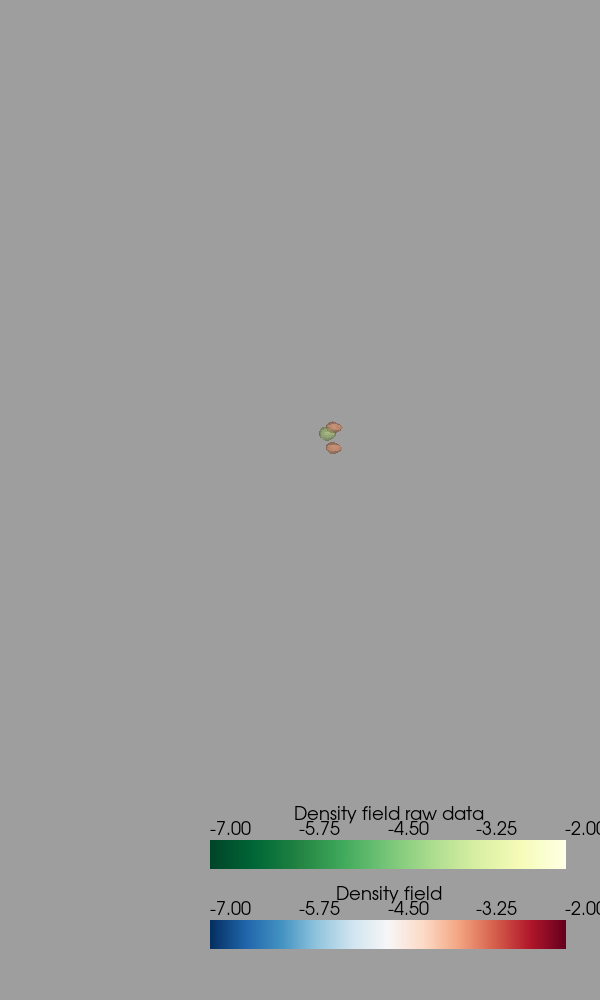

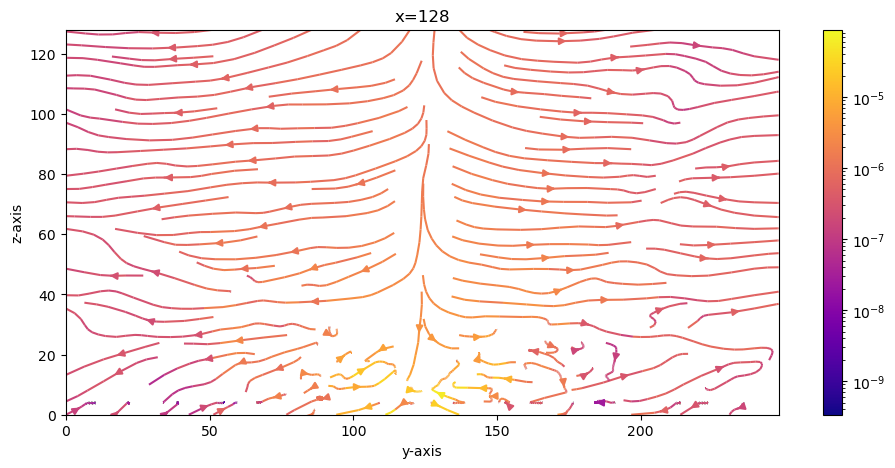

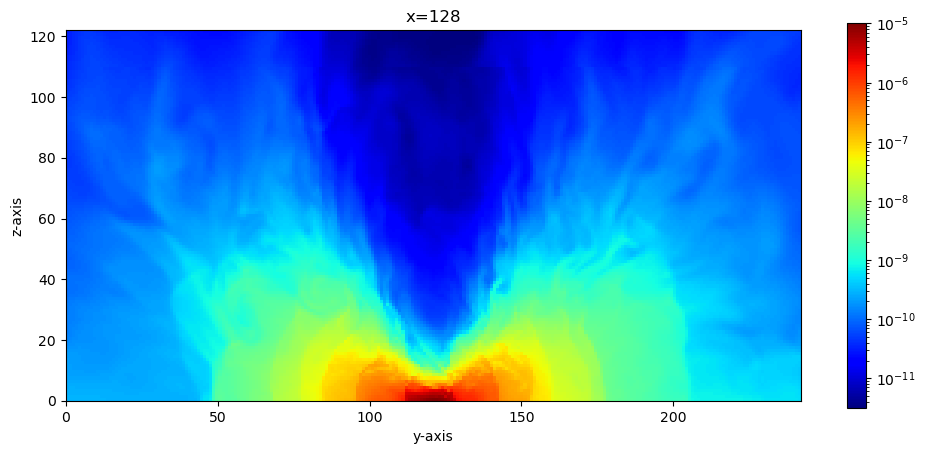

In [8]:
bernoulli_data = data_reader_bernoulli(0)
rho_data = data_reader_rho(0)
Bvec_data = new_data_reader_B(0)
raw_rho_data = raw_data_reader_rho(0)

field_plot.plot_slice(Bvec_data, 'x', 128, log_scale=True, cmap='plasma')
field_plot.plot_slice(raw_rho_data, 'x', 128, log_scale=True)

bernoulli, remaining_ber_kwargs = field_dp.get_plot_object(bernoulli_data, **bernoulli_kwargs.copy())
rho, remaining_rho_kwargs = field_dp.get_plot_object(rho_data, **rho_kwargs.copy())
Bvec, remaining_Bvec_kwargs = field_dp.get_plot_object(Bvec_data, **field_line_kwargs.copy())
rho_raw, remaining_rho_raw_kwargs = field_dp.get_plot_object(raw_rho_data, **raw_rho_kwargs.copy())

# kwargs['position'] = [-388, -120, 120]
# kwargs['focal_point'] = [0, 0, 0]
# kwargs['up'] = [0, 0, 1]

# field_plot.plotter([Bvec, bernoulli], [remaining_Bvec_kwargs, remaining_ber_kwargs], plotter_settings=kwargs.copy())
field_plot.plotter([rho, rho_raw], [remaining_rho_kwargs, remaining_rho_raw_kwargs], plotter_settings=kwargs.copy())
# field_plot.plotter([rho], [remaining_rho_kwargs], plotter_settings=kwargs.copy())
# field_plot.plotter([Bvec, rho], [remaining_Bvec_kwargs, remaining_rho_kwargs], plotter_settings=kwargs.copy())

Creating the animation

In [9]:
# kwargs['notebook'] = False
# kwargs['window_size'] = [1200, 2000]

# field_plot.animator([data_reader_bernoulli, data_reader_B], [bernoulli_kwargs, field_line_kwargs], save_path=save_path, n_datasets=len(it_list), n_processes=4, **kwargs)